In [1]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt

In [7]:
all_images = []
all_labels = []

for i , file in enumerate(glob.glob('fer_2013_dataset\\train\\*\\*')) :
    img = cv.imread(file)
    try :
        img = img/255.0
        
        all_images.append(img)
                
        label = file.split('\\')[-2]
        all_labels.append(label)
    except :
        pass
    

all_labels

['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',


In [9]:
le = LabelEncoder()
all_labels_le = le.fit_transform(all_labels)

all_labels_le = to_categorical(all_labels_le)

all_labels_le

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [10]:
all_images = np.array(all_images)

X_train , X_test , y_train , y_test = train_test_split(all_images , all_labels_le , test_size=0.2 ,random_state=120)

print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (22967, 48, 48, 3)
X_test :  (5742, 48, 48, 3)
y_train :  (22967, 7)
y_test :  (5742, 7)


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3) ,activation ='relu' , input_shape=(48, 48, 3)),
    layers.Conv2D(32, (3,3) ,activation ='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3,3) ,activation ='relu'),
    layers.Conv2D(64, (3,3) ,activation ='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(32,activation ='relu'),
    layers.Dense(7,activation ='softmax')
])

model.compile(optimizer='sgd' ,loss = "categorical_crossentropy", metrics =['accuracy'])

In [12]:
H = model.fit(X_train ,y_train , validation_data=(X_test,y_test) , epochs=10, batch_size=32)

Epoch 1/10
718/718 [==============================] - 168s 231ms/step - loss: 1.7364 - accuracy: 0.3167 - val_loss: 1.6424 - val_accuracy: 0.3457
Epoch 2/10
718/718 [==============================] - 181s 252ms/step - loss: 1.5572 - accuracy: 0.3884 - val_loss: 1.5140 - val_accuracy: 0.4068
Epoch 3/10
718/718 [==============================] - 168s 234ms/step - loss: 1.4755 - accuracy: 0.4248 - val_loss: 1.4504 - val_accuracy: 0.4215
Epoch 4/10
718/718 [==============================] - 178s 248ms/step - loss: 1.4200 - accuracy: 0.4476 - val_loss: 1.4503 - val_accuracy: 0.4350
Epoch 5/10
718/718 [==============================] - 162s 225ms/step - loss: 1.3709 - accuracy: 0.4698 - val_loss: 1.3966 - val_accuracy: 0.4556
Epoch 6/10
718/718 [==============================] - 170s 237ms/step - loss: 1.3166 - accuracy: 0.4904 - val_loss: 1.4194 - val_accuracy: 0.4523
Epoch 7/10
718/718 [==============================] - 163s 228ms/step - loss: 1.2732 - accuracy: 0.5091 - val_loss: 1.3039 -

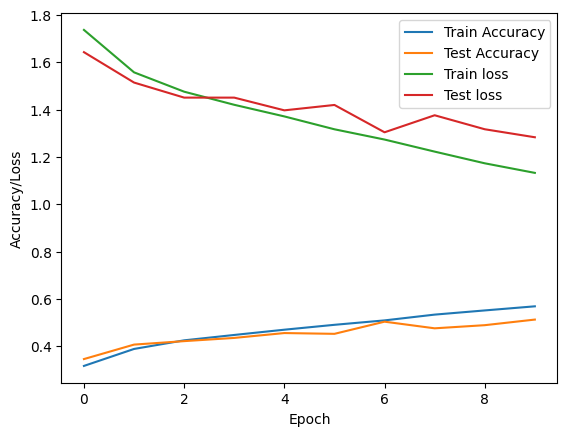

In [13]:
plt.plot(H.history['accuracy'] , label='Train Accuracy')
plt.plot(H.history['val_accuracy'] , label='Test Accuracy')

plt.plot(H.history['loss'] , label='Train loss')
plt.plot(H.history['val_loss'] , label='Test loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [14]:
model.save('fer_2013_model.h5')